In [0]:
%matplotlib inline

In [13]:
pip install japanize-matplotlib

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib 

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/bakoyashi/python-dataAnalysis/master/device.csv', index_col='Date', parse_dates=True)
data.head()

,Mobile,PC
Date,,
2019-06-30 23:00:00,7.0,15.0
2019-06-30 22:00:00,20.0,30.0
2019-06-30 21:00:00,31.0,32.0
2019-06-30 20:00:00,72.0,58.0
2019-06-30 19:00:00,58.0,77.0


In [16]:
data.columns = ['Mobile', 'PC']
data['Total'] = data.eval('Mobile + PC')
data.dropna().describe()

,Mobile,PC,Total
count,59079.000000,59079.000000,59079.000000
mean,52.382539,59.590125,111.972664
std,67.631882,86.871875,141.984104
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,70.000000,72.000000,146.000000
max,698.000000,850.000000,1097.000000


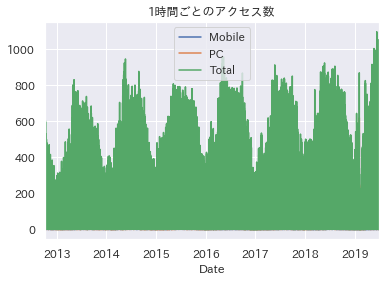

In [17]:
data.plot()
plt.title('1時間ごとのアクセス数');

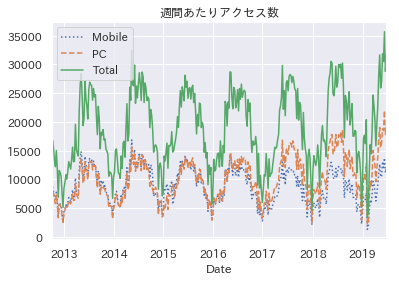

In [20]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.title('週間あたりアクセス数');

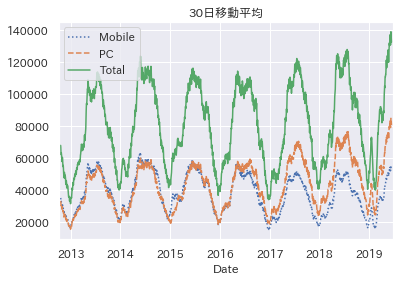

In [21]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.title('30日移動平均');

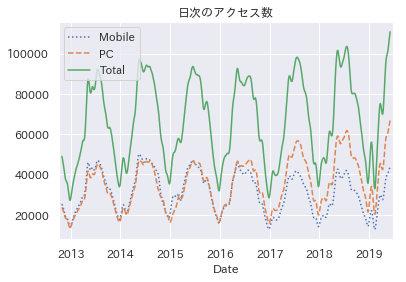

In [23]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);
plt.title('日次のアクセス数');

Text(0.5, 1.0, '時間ごとの平均アクセス数')

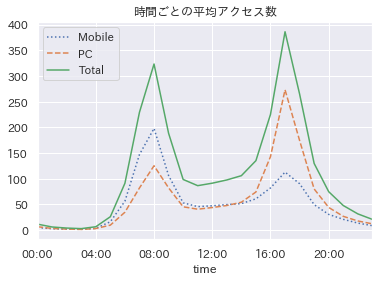

In [26]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);
plt.title('時間ごとの平均アクセス数')

Text(0.5, 1.0, '曜日ごとの平均アクセス数')

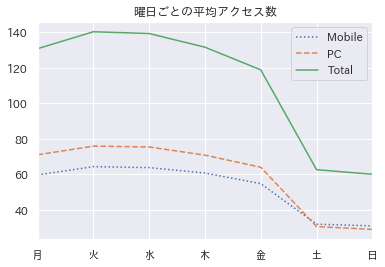

In [30]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['月', '火', '水', '木', '金', '土', '日']
by_weekday.plot(style=[':', '--', '-']);
plt.title('曜日ごとの平均アクセス数')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Text(0.5, 0.98, '平日と週末の時間別アクセス数')

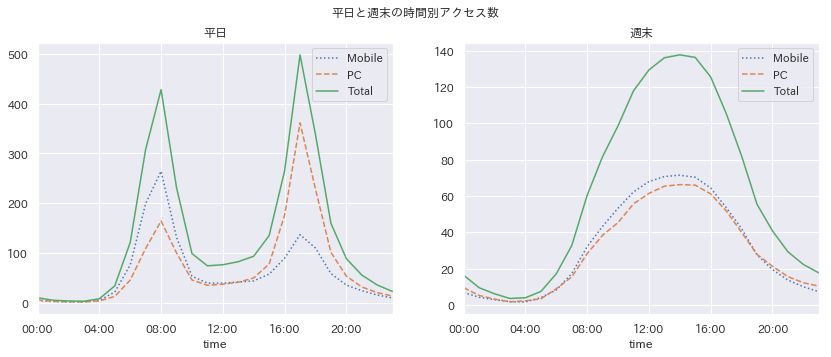

In [31]:
weekend = np.where(data.index.weekday < 5, '平日', '週末')
by_time = data.groupby([weekend, data.index.time]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['平日'].plot(ax=ax[0], title='平日',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['週末'].plot(ax=ax[1], title='週末',
                           xticks=hourly_ticks, style=[':', '--', '-']);
plt.suptitle('平日と週末の時間別アクセス数')